In [1]:
import numpy as np
from matplotlib import pyplot as plt
from typing import List

def UCB_bandit(means: List[float], variances: List[float], c: float, N: int=1000):
  num_actions = len(means)
  Qvalues = np.zeros([N+1, num_actions])
  Qvalues[0] = [np.random.normal(u,s) for u,s in zip(means, variances)]
  uncertainties = np.zeros([N, num_actions])
  actions = list(range(num_actions))

  for i in range(1,N+1):
    n = [actions.count(a) for a in range(num_actions)]
    uncertainties[i-1] = c*np.sqrt(np.divide(np.log(i),n))
    a = np.argmax(Qvalues[i-1] + uncertainties[i-1])
    r = np.random.normal(means[a], variances[a])

    Qvalues[i] = Qvalues[i-1]
    Qvalues[i,a] = (Qvalues[i,a]*n[a] + r) / (n[a] + 1)
    actions.append(a)

  plt.figure()
  for i in range(num_actions):
    plt.plot(range(1,N+1), Qvalues[1:,i], label="action "+str(i));
  plt.legend();
  plt.title("Q_t vs t");

  plt.figure()
  for i in range(num_actions):
    plt.plot(range(1,N+1), uncertainties[:,i], label="action "+str(i));
  plt.legend();
  plt.title("upper confidence interval vs t");

  plt.figure()
  plt.plot(range(1,N+1), actions[3:], '.');
  plt.title("action taken vs t");  

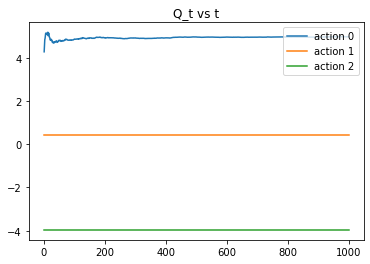

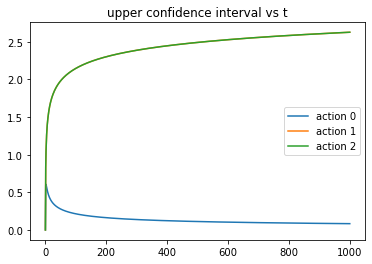

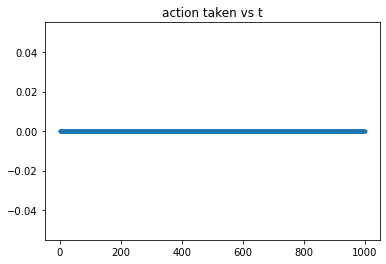

In [14]:
UCB_bandit([5,0,-5], [1,1,1],1)

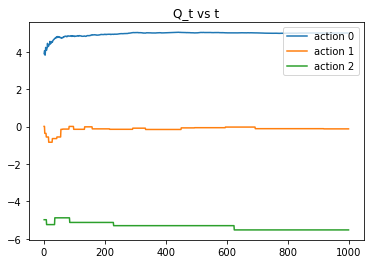

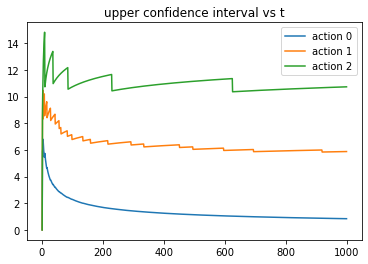

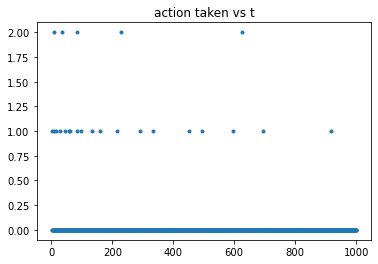

In [15]:
UCB_bandit([5,0,-5], [1,1,1],10)

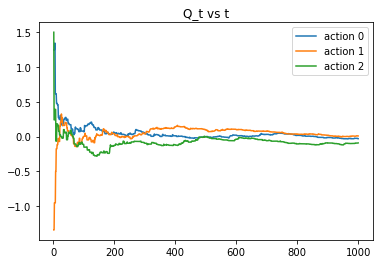

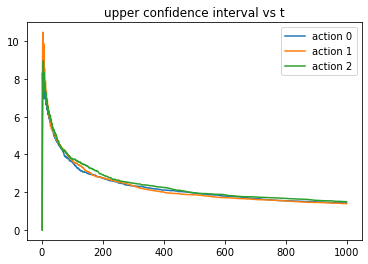

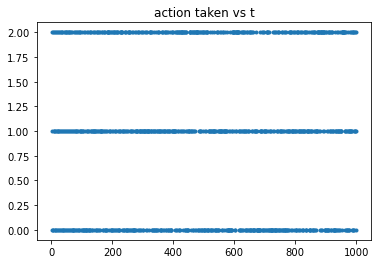

In [3]:
UCB_bandit([0,0,0], [1,1,1],10)

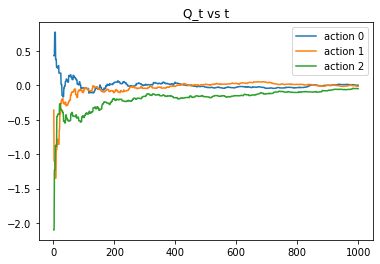

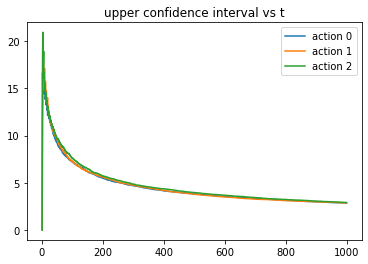

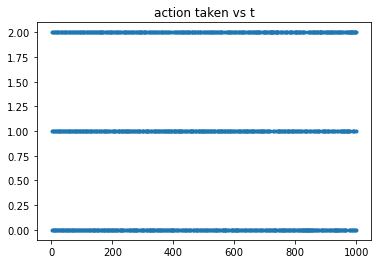

In [5]:
UCB_bandit([0,0,0], [1,1,1],20)

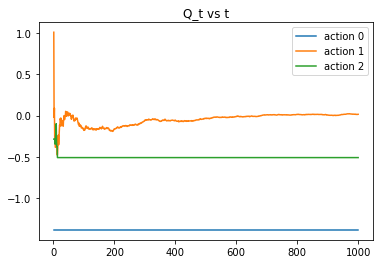

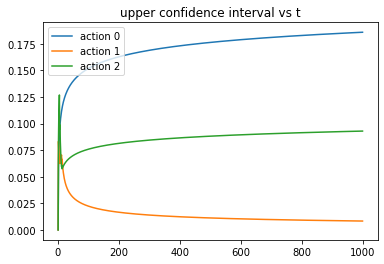

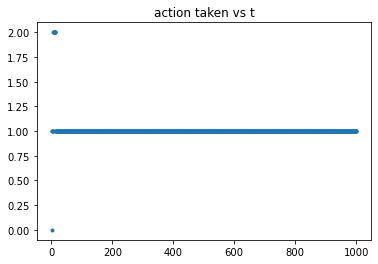

In [12]:
UCB_bandit([0,0,0], [1,1,1],0.1)

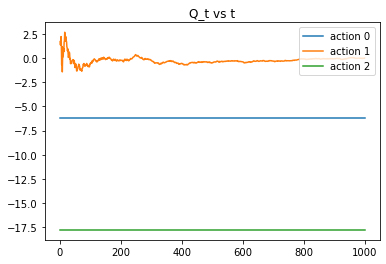

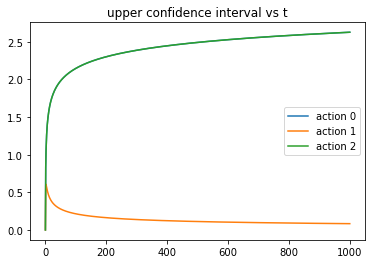

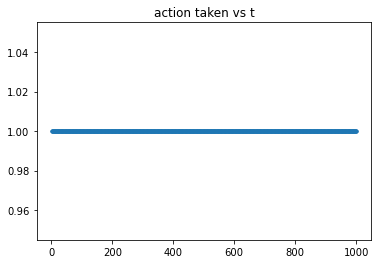

In [17]:
UCB_bandit([1,0,-1], [10,10,10],1)